# **Does the diversity of domain interests (DDS) relate to comfort levels?** 

**Aim:** The main aim is to assess if there is any meaningful relationship between domain diversity and comfort levels in programming, math, and statistics. Specifically, the analysis uses Spearman’s rank correlation and visualization tools to reveal potential patterns or lack thereof in the data.

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")

In [18]:
background = pd.read_csv("../data/background-clean.csv")
interest = pd.read_csv("../data/interest-clean.csv")

print("Background shape:", background.shape)
print("Interest shape:", interest.shape)
background.head()

Background shape: (51, 30)
Interest shape: (52, 5)


,response_id,prog.prof,prog.comf,math.prof,math.comf,stat.prof,stat.comf,updv.num,dom,do_you_have_any_preference_regarding_working_on_an_industry_project_or_a_research_lab_project,...,LING104,LING110,LING111,CS130,CS165,ECON145,PSTAT127,PSTAT134,CS5,rsrch
0,1,adv,5,int,4,adv,5,9+,Yes,No preference,...,1,1,1,0,0,0,0,0,0,True
1,2,adv,5,int,4,adv,4,6-8,No,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True
2,3,adv,4,int,4,adv,4,9+,No,I'm more interested in an industry project,...,0,0,0,1,1,0,0,0,0,False
3,4,adv,4,int,3,adv,4,9+,No,I'm more interested in an industry project,...,0,0,0,1,1,0,0,0,0,False
4,6,int,3,int,3,int,3,6-8,Yes,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True


In [19]:
# Split semicolon-separated domains
interest_expanded = interest.assign(dom=interest['dom'].str.split(';'))
interest_expanded = interest_expanded.explode('dom')
interest_expanded['dom'] = interest_expanded['dom'].str.strip()  # clean spaces

# One-hot encode
domain_dummies = pd.get_dummies(interest_expanded['dom'], prefix='domain')

# Join back with response_id
interest_onehot = pd.concat([interest_expanded[['response_id']], domain_dummies], axis=1)

# Group by response_id to sum up multiple selections
interest_onehot = interest_onehot.groupby('response_id').sum().reset_index()

interest_onehot.head(5)

,response_id,"domain_A mix of engineering/developing things that greatly help people (large, tangible), progressive, or state-of-art results, without necessarily needing expert domain expertise.",domain_Biology,domain_Chemistry,domain_Ecology,domain_Economics / Accounting,domain_Entertainment,domain_Environmental science,domain_Music & Audio,domain_Neuroscience,domain_Psychology,domain_Public health,domain_Social or political science,domain_Software development,domain_Technology,domain_media/musical technology
0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,2,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0
2,3,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,6,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0


In [20]:
domain_cols_for_sum = [col for col in interest_onehot.columns if col.startswith('domain_')]
interest_onehot['num_domains'] = interest_onehot[domain_cols_for_sum].sum(axis=1).astype(int)

In [21]:
merged = pd.merge(background, interest_onehot[['response_id', 'num_domains']], on='response_id', how='inner')

dds_variable = merged["num_domains"]
comfort_cols = ["prog.comf", "math.comf", "stat.comf"] # Correct column names from background-clean.csv

print("\n--- Spearman's Rank Correlation Results (Domain Diversity vs. Comfort) ---")

results = []

for comfort_col in comfort_cols:
    
    comfort_variable = merged[comfort_col]
    
    # Calculate Spearman's rho (rho) and the corresponding two-sided p-value
    # Spearman's correlation is appropriate for this ordinal data (1-5 comfort scale).
    rho, p_value = spearmanr(dds_variable, comfort_variable)
    
    # Determine the conclusion based on the p-value
    significance = 'Not Significant (p >= 0.05)' if p_value >= 0.05 else 'Significant (p < 0.05)'
    
    results.append({
        'comfort_metric': comfort_col,
        'Spearman_Rho': rho,
        'P_Value': p_value,
        'Significance': significance
    })

# Display Results
results_df = pd.DataFrame(results).round(4)
print(results_df.to_markdown(index=False))


--- Spearman's Rank Correlation Results (Domain Diversity vs. Comfort) ---
| comfort_metric   |   Spearman_Rho |   P_Value | Significance                |
|:-----------------|---------------:|----------:|:----------------------------|
| prog.comf        |        -0.0963 |    0.5103 | Not Significant (p >= 0.05) |
| math.comf        |         0.0514 |    0.7257 | Not Significant (p >= 0.05) |
| stat.comf        |        -0.0776 |    0.5963 | Not Significant (p >= 0.05) |


The results of the Spearman's rank correlation analysis show that there is no statistically significant relationship between domain diversity (how many fields a student is interested in) and their self-reported comfort in programming, math, or statistics. All p-values are greater than 0.05, indicating the observed correlations are likely due to chance rather than a meaningful association between variables. The Spearman rho values are all small (close to zero), with none showing a strong positive or negative trend.

**Programming Comfort**  
\[
rho = -0.0963, quad p = 0.5103
\]  
There is a very weak negative correlation that is not statistically significant.  

**Math Comfort**  
\[
rho = 0.0514, quad p = 0.7257
\]  
There is a very weak positive correlation that is not statistically significant.  

**Statistics Comfort**  
\[
rho = -0.0776, quad p = 0.5963
\]  
There is a very weak negative correlation that is not statistically significant.


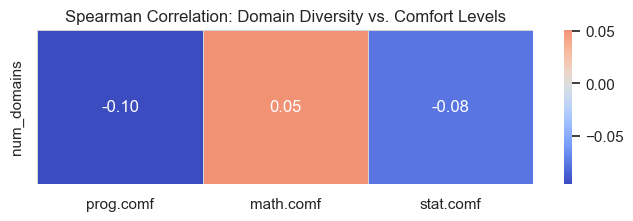

In [22]:
heatmap_data = merged[comfort_cols + ['num_domains']].corr(method='spearman').loc[['num_domains'], comfort_cols]

plt.figure(figsize=(8, 2))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap='coolwarm',
    center=0,
    cbar=True,
    linewidths=0.5,
    linecolor='lightgray',
    fmt=".2f",
    yticklabels=['num_domains'] 
)
plt.title("Spearman Correlation: Domain Diversity vs. Comfort Levels")
plt.xticks(rotation=0)
plt.show()


The heatmap illustrates the Spearman correlation coefficients between domain diversity (number of domains selected) and comfort levels in programming, math, and statistics. Both the annotated values and the color intensity convey the strength and direction of these relationships.

All correlations are close to zero, which is reflected in the neutral colors and the small numerical values on the heatmap. This visual summary aligns with the tabular results, confirming that there are no strong or statistically significant associations between interest diversity and comfort in any of the examined areas.

**Conclusion:** Based on both the numeric results and the visuals, there is no strong evidence that students who are interested in a larger number of academic domains feel consistently more or less comfortable with programming, math, or statistics. The data do not show any meaningful trends, and the analysis suggests that domain diversity does not predict technical comfort in this sample.